# <center>Исследование поведения пользователей для телекоммуникационной компании</center>

## <center>Содержание</center>

<br>**Введение**
<br>**Импорт библиотек**
<br>**Предобработка данных**
+ Объединение данных

<br>**Анализ данных**
<br>**Общий вывод**

## <center>Введение</center>

Цель проекта - проанализировать поведение пользователей двух тарифов сети Мегалайн "Смарт" и "Ультра". Предоставлены данные о поведении пользователей за 2018 год.

В таблице **users** (информация о пользователях) содержится идентификатор пользователя `user_id`, имя `first name`, фамилия `last_name`, город проживания `city`, возраст `age`, дата подключения тарифа `reg_date`и дата прекращения обслуживания `churn_date`, а также название тарифного плана `tarif`.

<br>В таблице **calls** (информация о звонках) содержится идентификатор звонка (не пользователя!) `id`, дата звонка `call_date`, длительность (мин) `duration` и id пользователя `user_id`.

<br>В таблице **messages** (информация о сообщениях) содержится идентификатор сообщения `id`, дата отправки сообщения `message_date` и идентификатор пользователя, отправившего сообщение `user_id`.

<br>В таблице **internet** (информация об интернет-сессиях) содержится идентификатор сессии `id`, объём траффика (Мб) `mb_used`, дата сессии `session_date` и идентификатор пользователя `user_id`.

<br>В таблице **tariffs** (информация о тарифах) содержится название тарифа `tariff_name`, ежемесячная абонентская плата (руб) `rub_monthly_fee` и включённые в эту абонентскую плату:
* `minutes_included` — минуты
* `messages_included` — сообщения
* `mb_per_month_included` — интернет-траффик (Мб)

Также включены расценки при превышении лимита:
* `rub_per_minute` — минуты сверх пакета
* `rub_per_message` — сообщения сверх пакета
* `rub_per_gb` — дополнительный интернет-траффик сверх пакета в гигабайтах

## <center>Импорт библиотек</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## <center>Предобработка данных</center>

Посмотрим на имеющиеся данные:

In [2]:
data_users = pd.read_csv('users.csv')
data_calls = pd.read_csv('calls.csv')
data_messages = pd.read_csv('messages.csv')
data_internet = pd.read_csv('internet.csv')
data_tariffs = pd.read_csv('tariffs.csv')

#из таблицы пользователей для сохранения приватности данных уберём имена и фамилии:
data_users = data_users.drop(['first_name', 'last_name'], axis=1)

print('users:')
display(data_users.head(10))
print(data_users.info())
print('***')
print('calls:')
display(data_calls.head(10))
print(data_calls.info())
print('***')
print('messages:')
display(data_messages.head(10))
print(data_messages.info())
print('***')
print('internet:')
display(data_internet.head(10))
print(data_internet.info())
print('***')
print('tariffs:')
display(data_tariffs.head(10))
print(data_tariffs.info())

users:


,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaN,Краснодар,2018-05-25,ultra
1,1001,41,NaN,Москва,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,2018-06-17,smart
3,1003,23,NaN,Москва,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,2018-01-25,smart
6,1006,21,NaN,Ульяновск,2018-02-26,smart
7,1007,65,NaN,Москва,2018-04-19,smart
8,1008,63,NaN,Челябинск,2018-12-19,smart
9,1009,24,NaN,Пермь,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   reg_date    500 non-null    object
 5   tariff      500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB
None
***
calls:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
***
messages:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
***
internet:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
***
tariffs:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


Проблем в целом не так много - начнём с **пользователей**. Здесь у нас много пропусков в дате прекращения тарифа - подразумевается, что на момент выгрузки данных тариф ещё действовал - заполним пропуски датой "1 января 2051 года" и переведём столбцы churn_date и reg_date в дату.

In [3]:
data_users['churn_date'] = data_users['churn_date'].fillna('2051-01-01')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

display(data_users.head(10))
print(data_users.info())

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,2051-01-01,Краснодар,2018-05-25,ultra
1,1001,41,2051-01-01,Москва,2018-11-01,smart
2,1002,59,2051-01-01,Стерлитамак,2018-06-17,smart
3,1003,23,2051-01-01,Москва,2018-08-17,ultra
4,1004,68,2051-01-01,Новокузнецк,2018-05-14,ultra
5,1005,67,2051-01-01,Набережные Челны,2018-01-25,smart
6,1006,21,2051-01-01,Ульяновск,2018-02-26,smart
7,1007,65,2051-01-01,Москва,2018-04-19,smart
8,1008,63,2051-01-01,Челябинск,2018-12-19,smart
9,1009,24,2051-01-01,Пермь,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   reg_date    500 non-null    datetime64[ns]
 5   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 23.6+ KB
None


И проверим самое важное, что нас будет в этой таблице интересовать - тариф:

In [4]:
print(data_users['tariff'].value_counts()) 

smart    351
ultra    149
Name: tariff, dtype: int64


А также посмотрим на диапазон дат, с которыми мы имеем дело (это будет важно в дальнейшем):

In [5]:
print(data_users['reg_date'].min())
print(data_users['reg_date'].max())

2018-01-01 00:00:00
2018-12-31 00:00:00


С тарифом всё в порядке, с датами теперь тоже - переходим к **звонкам**. Так же превратим дату в, собственно, дату:

In [6]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

И разберёмся с длительностью звонков. Она дана в минутах и каждый звонок оператор округляет до целого вверх - это и сделаем, после переведя в целочисленный тип:

In [7]:
import numpy as np
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls['duration'] = data_calls['duration'].astype('int64')

display(data_calls.head(10))
print(data_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
None


Замечательно - и здесь тоже посмотрим на диапазон дат:

In [8]:
print(data_calls['call_date'].min())
print(data_calls['call_date'].max())

2018-01-01 00:00:00
2018-12-31 00:00:00


Едем дальше. В **сообщениях** переведём дату в дату и посмотрим диапазон:

In [9]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

print(data_messages['message_date'].min())
print(data_messages['message_date'].max())
display(data_messages.head(10))
print(data_messages.info())

2018-01-02 00:00:00
2018-12-31 00:00:00


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


И на этом всё. С **интернетом** чуть-чуть сложнее: трафик тоже округляется вверх, но за месяц, так что сессии пока трогать не будем - только опять переведём дату в дату и удалим странный столбец "Unnamed: 0", который просто повторяет индексы:

In [10]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet = data_internet.drop(columns='Unnamed: 0')

print(data_internet['session_date'].min())
print(data_internet['session_date'].max())
display(data_internet.head(10))
print(data_internet.info())

2018-01-01 00:00:00
2018-12-31 00:00:00


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
None


Теперь данные выглядят прилично :) А также мы убедились, что действительно имеем дело с данными за 2018 год - это сыграет роль в дальнейшем. 

### <center>Объединение данных</center>

Считаем мы по месяцам - в каждой таблице для каждой записи выделим месяц:

In [11]:
data_calls['month'] = data_calls['call_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month

display(data_calls.head())
display(data_messages.head())
display(data_internet.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Рассчитаем для каждого пользователя длительность звонков и их количество по месяцам - без учёта непринятых звонков, то есть звонков с длительностью 0. Учитывать их здесь я не вижу смысла: непринятые звонки заслуживают отдельного исследования, а в нашем контексте нас интересует скорее количество звонков реально произошедших, то есть сколько раз в месяц человек действительно разговаривал по телефону. Попробуем посмотреть, что у нас получится:

In [12]:
pivot_calls_count = data_calls.query('duration != 0').pivot_table(
    index='user_id', columns='month', values='duration', aggfunc='count')
pivot_calls_sum = data_calls.query('duration != 0').pivot_table(
    index='user_id', columns='month', values='duration', aggfunc='sum')

display(pivot_calls_count.head(10))
print(pivot_calls_count.info())
display(pivot_calls_sum.head(10))
print(pivot_calls_sum.info())

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,17.0,28.0,41.0,42.0,46.0,44.0,37.0,38.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,47.0
1002,NaN,NaN,NaN,NaN,NaN,14.0,21.0,37.0,25.0,24.0,25.0,27.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,105.0,97.0,95.0,88.0
1004,NaN,NaN,NaN,NaN,7.0,25.0,20.0,18.0,18.0,21.0,15.0,15.0
1005,11.0,55.0,63.0,77.0,62.0,69.0,62.0,64.0,57.0,78.0,60.0,63.0
1006,NaN,3.0,36.0,38.0,45.0,48.0,38.0,32.0,47.0,35.0,46.0,44.0
1007,NaN,NaN,NaN,21.0,57.0,55.0,57.0,49.0,68.0,53.0,67.0,54.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       42 non-null     float64
 1   2       81 non-null     float64
 2   3       114 non-null    float64
 3   4       164 non-null    float64
 4   5       205 non-null    float64
 5   6       244 non-null    float64
 6   7       288 non-null    float64
 7   8       336 non-null    float64
 8   9       369 non-null    float64
 9   10      411 non-null    float64
 10  11      444 non-null    float64
 11  12      470 non-null    float64
dtypes: float64(12)
memory usage: 50.0 KB
None


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
1005,95.0,456.0,606.0,712.0,595.0,612.0,569.0,619.0,479.0,723.0,547.0,592.0
1006,NaN,42.0,286.0,356.0,370.0,478.0,316.0,275.0,360.0,267.0,372.0,379.0
1007,NaN,NaN,NaN,198.0,480.0,545.0,577.0,458.0,655.0,465.0,580.0,421.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       42 non-null     float64
 1   2       81 non-null     float64
 2   3       114 non-null    float64
 3   4       164 non-null    float64
 4   5       205 non-null    float64
 5   6       244 non-null    float64
 6   7       288 non-null    float64
 7   8       336 non-null    float64
 8   9       369 non-null    float64
 9   10      411 non-null    float64
 10  11      444 non-null    float64
 11  12      470 non-null    float64
dtypes: float64(12)
memory usage: 50.0 KB
None


И вот здесь у нас вылезает специфика данных: мы рассматриваем поведение за 2018 год пользователей, заключивших договор _также в 2018-м году_. Следуют из этого две вещи:
* какой-либо анализ стоит производить только на **втором полугодии 2018-ого года**, потому что только к этому моменту можно перестать волноваться о слишком малом размере выборки (в инфо таблицы видно, что количество "непропусковых" записей увеличивается - и брать, например, январь с его 42 пользователями для анализа странно. Для каждого тарифа мы получаем выборку меньше 30 человек - декабрь, где записей уже 470, выглядит гораздо более перспективным) 
* с пропусками нужно что-то делать, как нужно определиться с методом расчёта в принципе - об этом далее

Вопрос: а как учитывать поведение пользователя, зарегистрированного, скажем, 25 мая? Для него месяц - это от 25 мая до 25 июня? Тогда для каждого пользователя нужно считать звонки, смски и интернет по диапазонам, заданным "вручную" - это сложно и не особо нужна такая аккуратность в нашем контексте. Хочется просто поделить по месяцам, как мы сделали - но тогда что делать с "майским огрызком"? В мае человек пользовался тарифом всего 6 дней - эти данные будут искажать картину.

Поступим следующим образом: будем рассматривать поведение пользователей, начиная с месяца, _следующего за месяцем регистрации_. То есть если человек зарегистрировался в мае, то все месяцы "до", _включая май_, мы для него заполним заглушкой "-1". И то же самое сделаем в случае разрыва договора: если человек прекратил пользоваться связью в декабре, то декабрь мы заполняем "-1" и его _не_ учитываем. Это позволит нам рассматривать поведение пользователей только в месяцы, когда они действительно пользовались связью целый месяц - что нам и нужно.

А если человек зарегистрировался в мае, но пропуск у него имеется в июне, это значит, что в июне он просто не разговаривал по телефону - но при этом мог слать смски или пользоваться интернетом. Если месяц лежит в диапазоне "от месяца регистрации +1 до месяца расторжения -1" и представляет собой пропуск, то этот пропуск мы заполняем нулём.

Реализуем эту логику через функцию, которую будем применять и в дальнейшем:

In [13]:
data_users['reg_month'] = data_users['reg_date'].dt.month #месяц регистрации
data_users['churn_month'] = data_users['churn_date'].dt.month #месяц расторжения
data_users['churn_year'] = data_users['churn_date'].dt.year #год расторжения

def nans_filler(number, user_id, month, df_users):
    month_reg = df_users.loc[df_users['user_id'] == user_id, 'reg_month'].values[0] #месяц регистрации пользователя
    month_exp = df_users.loc[df_users['user_id'] == user_id, 'churn_month'].values[0] #месяц расторжения пользователя
    year_exp = df_users.loc[df_users['user_id'] == user_id, 'churn_year'].values[0] #год расторжения пользователя
    
    #если месяц лежит в диапазоне "до месяца регистрации включительно" - возвращаем -1:
    if month <= month_reg:
        return -1
    #если месяц лежит в диапазоне "после месяца расторжения включительно" и год расторжения - 2018, опять -1:
    elif (month >= month_exp) and (year_exp == 2018):
        return -1
    #договор действует, но звонков/смсок/интернета не было:
    elif np.isnan(number):
        return 0
    else:
        return number

In [14]:
pivot_calls_count['user_id'] = pivot_calls_count.index
pivot_calls_sum['user_id'] = pivot_calls_count.index

#применяем функцию для всех столбцов:
for i in range(1, 13):
    pivot_calls_count[i] = pivot_calls_count.apply(lambda x: nans_filler(x[i], x['user_id'], i, data_users), axis=1)
    pivot_calls_sum[i] = pivot_calls_sum.apply(lambda x: nans_filler(x[i], x['user_id'], i, data_users), axis=1)

#приводим к целочисленному типу:
pivot_calls_count = pivot_calls_count.drop(columns='user_id').astype('int64') 
pivot_calls_sum = pivot_calls_sum.drop(columns='user_id').astype('int64')  

#проверка:
display(pivot_calls_count.head(10))
print(pivot_calls_count.info())   
display(pivot_calls_sum.head(10))
print(pivot_calls_sum.info())   

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,-1,-1,-1,-1,-1,28,41,42,46,44,37,38
1001,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,47
1002,-1,-1,-1,-1,-1,-1,21,37,25,24,25,27
1003,-1,-1,-1,-1,-1,-1,-1,-1,105,97,95,88
1004,-1,-1,-1,-1,-1,25,20,18,18,21,15,15
1005,-1,55,63,77,62,69,62,64,57,78,60,63
1006,-1,-1,36,38,45,48,38,32,47,35,46,44
1007,-1,-1,-1,-1,57,55,57,49,68,53,67,54
1008,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       492 non-null    int64
 1   2       492 non-null    int64
 2   3       492 non-null    int64
 3   4       492 non-null    int64
 4   5       492 non-null    int64
 5   6       492 non-null    int64
 6   7       492 non-null    int64
 7   8       492 non-null    int64
 8   9       492 non-null    int64
 9   10      492 non-null    int64
 10  11      492 non-null    int64
 11  12      492 non-null    int64
dtypes: int64(12)
memory usage: 50.0 KB
None


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,-1,-1,-1,-1,-1,172,340,408,466,350,338,333
1001,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,414
1002,-1,-1,-1,-1,-1,-1,214,289,206,212,243,236
1003,-1,-1,-1,-1,-1,-1,-1,-1,961,855,824,802
1004,-1,-1,-1,-1,-1,171,135,137,117,145,117,130
1005,-1,456,606,712,595,612,569,619,479,723,547,592
1006,-1,-1,286,356,370,478,316,275,360,267,372,379
1007,-1,-1,-1,-1,480,545,577,458,655,465,580,421
1008,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       492 non-null    int64
 1   2       492 non-null    int64
 2   3       492 non-null    int64
 3   4       492 non-null    int64
 4   5       492 non-null    int64
 5   6       492 non-null    int64
 6   7       492 non-null    int64
 7   8       492 non-null    int64
 8   9       492 non-null    int64
 9   10      492 non-null    int64
 10  11      492 non-null    int64
 11  12      492 non-null    int64
dtypes: int64(12)
memory usage: 50.0 KB
None


Столбец с user_id нам ещё понадобится - смотрим смски "как есть":

In [15]:
pivot_messages = data_messages.pivot_table(
    index='user_id', columns='month', values='id', aggfunc='count')


display(pivot_messages.head(10))
print(pivot_messages.info())

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,18.0,21.0,26.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,15.0,11.0,12.0
1011,NaN,NaN,4.0,7.0,13.0,13.0,13.0,15.0,10.0,17.0,12.0,6.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       38 non-null     float64
 1   2       66 non-null     float64
 2   3       94 non-null     float64
 3   4       135 non-null    float64
 4   5       174 non-null    float64
 5   6       209 non-null    float64
 6   7       247 non-null    float64
 7   8       292 non-null    float64
 8   9       318 non-null    float64
 9   10      357 non-null    float64
 10  11      383 non-null    float64
 11  12      404 non-null    float64
dtypes: float64(12)
memory usage: 43.3 KB
None


Картина та же - делаем то же самое:

In [16]:
pivot_messages['user_id'] = pivot_messages.index

#применяем функцию для всех столбцов:
for i in range(1, 13):
    pivot_messages[i] = pivot_messages.apply(lambda x: nans_filler(x[i], x['user_id'], i, data_users), axis=1)

#приводим к целочисленному типу:
pivot_messages = pivot_messages.drop(columns='user_id').astype('int64') 

#проверка:
display(pivot_messages.head(10))
print(pivot_messages.info())   

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,-1,-1,-1,-1,-1,60,75,81,57,73,58,70
1002,-1,-1,-1,-1,-1,-1,11,13,4,10,16,12
1003,-1,-1,-1,-1,-1,-1,-1,-1,91,83,94,75
1004,-1,-1,-1,-1,-1,134,181,151,146,165,158,162
1005,-1,38,56,41,42,47,56,64,52,44,51,54
1007,-1,-1,-1,-1,39,26,26,27,31,18,21,26
1008,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1009,-1,-1,-1,14,7,14,14,9,12,15,11,12
1011,-1,-1,-1,7,13,13,13,15,10,17,12,6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       426 non-null    int64
 1   2       426 non-null    int64
 2   3       426 non-null    int64
 3   4       426 non-null    int64
 4   5       426 non-null    int64
 5   6       426 non-null    int64
 6   7       426 non-null    int64
 7   8       426 non-null    int64
 8   9       426 non-null    int64
 9   10      426 non-null    int64
 10  11      426 non-null    int64
 11  12      426 non-null    int64
dtypes: int64(12)
memory usage: 43.3 KB
None


Остался интернет. Смотрим "как есть":

In [17]:
pivot_internet = data_internet.pivot_table(
    index='user_id', columns='month', values='mb_used', aggfunc='sum')

display(pivot_internet.head(10))
print(pivot_internet.info())

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
1005,2727.97,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,7800.93,12666.95,8668.19
1006,NaN,1392.15,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,19696.60,13259.41,18476.11
1007,NaN,NaN,NaN,8022.76,17687.27,13654.52,15656.66,20700.40,12613.05,14427.33,16369.61,12494.07
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13217.14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       43 non-null     float64
 1   2       80 non-null     float64
 2   3       114 non-null    float64
 3   4       167 non-null    float64
 4   5       207 non-null    float64
 5   6       247 non-null    float64
 6   7       291 non-null    float64
 7   8       340 non-null    float64
 8   9       374 non-null    float64
 9   10      416 non-null    float64
 10  11      449 non-null    float64
 11  12      475 non-null    float64
dtypes: float64(12)
memory usage: 50.5 KB
None


Делаем то же самое, только не приводим к целочисленному типу:

In [18]:
pivot_internet['user_id'] = pivot_internet.index

#применяем функцию для всех столбцов:
for i in range(1, 13):
    pivot_internet[i] = pivot_internet.apply(lambda x: nans_filler(x[i], x['user_id'], i, data_users), axis=1)
pivot_internet = pivot_internet.drop(columns='user_id')

#проверка:
display(pivot_internet.head(10))
print(pivot_internet.info())   

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,-1,-1.00,-1.00,-1.00,-1.00,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,-1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,14036.66
1002,-1,-1.00,-1.00,-1.00,-1.00,-1.00,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,-1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,12468.87,14768.14,11356.89,10121.53
1004,-1,-1.00,-1.00,-1.00,-1.00,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
1005,-1,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,7800.93,12666.95,8668.19
1006,-1,-1.00,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,19696.60,13259.41,18476.11
1007,-1,-1.00,-1.00,-1.00,17687.27,13654.52,15656.66,20700.40,12613.05,14427.33,16369.61,12494.07
1008,-1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       497 non-null    int64  
 1   2       497 non-null    float64
 2   3       497 non-null    float64
 3   4       497 non-null    float64
 4   5       497 non-null    float64
 5   6       497 non-null    float64
 6   7       497 non-null    float64
 7   8       497 non-null    float64
 8   9       497 non-null    float64
 9   10      497 non-null    float64
 10  11      497 non-null    float64
 11  12      497 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 50.5 KB
None


И теперь округлим интернет за месяц до гигабайт в большую сторону - и приведём к целочисленному типу:

In [19]:
def gigabytes(number):
    if number <= 0:
        return number
    else:
        return np.ceil(number / 1024)
    
for i in range(1, 13):
    pivot_internet[i] = pivot_internet[i].apply(gigabytes)   
pivot_internet = pivot_internet.astype('int64')
    
display(pivot_internet.head(10))
print(pivot_internet.info())   

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,-1,-1,-1,-1,-1,23,14,14,15,15,15,10
1001,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,14
1002,-1,-1,-1,-1,-1,-1,18,20,17,14,19,18
1003,-1,-1,-1,-1,-1,-1,-1,-1,13,15,12,10
1004,-1,-1,-1,-1,-1,18,22,28,15,19,16,18
1005,-1,8,11,10,8,10,8,8,7,8,13,9
1006,-1,-1,17,14,13,13,20,19,16,20,13,19
1007,-1,-1,-1,-1,18,14,16,21,13,15,16,13
1008,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       497 non-null    int64
 1   2       497 non-null    int64
 2   3       497 non-null    int64
 3   4       497 non-null    int64
 4   5       497 non-null    int64
 5   6       497 non-null    int64
 6   7       497 non-null    int64
 7   8       497 non-null    int64
 8   9       497 non-null    int64
 9   10      497 non-null    int64
 10  11      497 non-null    int64
 11  12      497 non-null    int64
dtypes: int64(12)
memory usage: 50.5 KB
None


Итого мы получили поведение пользователей в месяцы, когда они пользовались тарифом целиком - ура, победа. Сливать эти таблицы в одну, если честно, очень бы не хотелось - работать с ними по отдельности удобнее.

Перейдём к последнему пункту программы, а именно - **расчёту помесячной выручки**. Сначала создадим датафрейм-словарь "пользователь - тариф", который понадобится нам и в дальнейшем:

In [20]:
tariff_dict = data_users[['user_id', 'tariff']]

display(tariff_dict.head(10))
print(tariff_dict.info())

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra
5,1005,smart
6,1006,smart
7,1007,smart
8,1008,smart
9,1009,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  500 non-null    int64 
 1   tariff   500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
None


Будем считать сразу дополнительную (сверх тарифа) выручку по позициям звонки/смс/интернет в рублях. Соединим словарь с длительностью звонков и вычтем либо 500 минут, либо 3000 в зависимости от тарифа, а затем домножим разницу на цену в зависимости от тарифа:

In [21]:
extra_minutes = pd.merge(pivot_calls_sum, tariff_dict, on='user_id')

def subtract_minutes(minutes, tariff):
    if tariff == 'ultra':
        if minutes - 3000 > 0:
            return minutes - 3000
        else:
            return 0
    else:
        if minutes - 500 > 0:
            return (minutes - 500) * 3
        else:
            return 0

for i in range(1, 13):
    extra_minutes[i] = extra_minutes.apply(lambda x: subtract_minutes(x[i], x['tariff']), axis=1)

display(extra_minutes.head(15))
print(extra_minutes.info())

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0,0,0,0,0,0,0,0,0,0,0,0,ultra
1,1001,0,0,0,0,0,0,0,0,0,0,0,0,smart
2,1002,0,0,0,0,0,0,0,0,0,0,0,0,smart
3,1003,0,0,0,0,0,0,0,0,0,0,0,0,ultra
4,1004,0,0,0,0,0,0,0,0,0,0,0,0,ultra
5,1005,0,0,318,636,285,336,207,357,0,669,141,276,smart
6,1006,0,0,0,0,0,0,0,0,0,0,0,0,smart
7,1007,0,0,0,0,0,135,231,0,465,0,240,0,smart
8,1008,0,0,0,0,0,0,0,0,0,0,0,0,smart
9,1009,0,0,0,0,0,0,0,0,0,0,0,0,smart


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  492 non-null    int64 
 1   1        492 non-null    int64 
 2   2        492 non-null    int64 
 3   3        492 non-null    int64 
 4   4        492 non-null    int64 
 5   5        492 non-null    int64 
 6   6        492 non-null    int64 
 7   7        492 non-null    int64 
 8   8        492 non-null    int64 
 9   9        492 non-null    int64 
 10  10       492 non-null    int64 
 11  11       492 non-null    int64 
 12  12       492 non-null    int64 
 13  tariff   492 non-null    object
dtypes: int64(13), object(1)
memory usage: 57.7+ KB
None


Замена нулями произведена чисто для удобства будущего расчёта. Проделаем то же самое с смсками:

In [22]:
extra_messages = pd.merge(pivot_messages, tariff_dict, on='user_id')

def subtract_messages(messages, tariff):
    if tariff == 'ultra':
        if messages - 1000 > 0:
            return messages - 1000
        else:
            return 0
    else:
        if messages - 50 > 0:
            return (messages - 50) * 3
        else:
            return 0

for i in range(1, 13):
    extra_messages[i] = extra_messages.apply(lambda x: subtract_messages(x[i], x['tariff']), axis=1)

display(extra_messages.head(15))
print(extra_messages.info())

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0,0,0,0,0,0,0,0,0,0,0,0,ultra
1,1002,0,0,0,0,0,0,0,0,0,0,0,0,smart
2,1003,0,0,0,0,0,0,0,0,0,0,0,0,ultra
3,1004,0,0,0,0,0,0,0,0,0,0,0,0,ultra
4,1005,0,0,18,0,0,0,18,42,6,0,3,12,smart
5,1007,0,0,0,0,0,0,0,0,0,0,0,0,smart
6,1008,0,0,0,0,0,0,0,0,0,0,0,0,smart
7,1009,0,0,0,0,0,0,0,0,0,0,0,0,smart
8,1011,0,0,0,0,0,0,0,0,0,0,0,0,smart
9,1012,0,0,0,0,0,0,0,0,0,0,0,0,smart


<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  426 non-null    int64 
 1   1        426 non-null    int64 
 2   2        426 non-null    int64 
 3   3        426 non-null    int64 
 4   4        426 non-null    int64 
 5   5        426 non-null    int64 
 6   6        426 non-null    int64 
 7   7        426 non-null    int64 
 8   8        426 non-null    int64 
 9   9        426 non-null    int64 
 10  10       426 non-null    int64 
 11  11       426 non-null    int64 
 12  12       426 non-null    int64 
 13  tariff   426 non-null    object
dtypes: int64(13), object(1)
memory usage: 49.9+ KB
None


И с интернетом:

In [23]:
extra_internet = pd.merge(pivot_internet, tariff_dict, on='user_id')

def subtract_internet(internet, tariff):
    if tariff == 'ultra':
        if internet - 30 > 0:
            return (internet - 30) * 150
        else:
            return 0
    else:
        if internet - 15 > 0:
            return (internet - 15) * 200
        else:
            return 0

for i in range(1, 13):
    extra_internet[i] = extra_internet.apply(lambda x: subtract_internet(x[i], x['tariff']), axis=1)

display(extra_internet.head(15))
print(extra_internet.info())

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0,0,0,0,0,0,0,0,0,0,0,0,ultra
1,1001,0,0,0,0,0,0,0,0,0,0,0,0,smart
2,1002,0,0,0,0,0,0,600,1000,400,0,800,600,smart
3,1003,0,0,0,0,0,0,0,0,0,0,0,0,ultra
4,1004,0,0,0,0,0,0,0,0,0,0,0,0,ultra
5,1005,0,0,0,0,0,0,0,0,0,0,0,0,smart
6,1006,0,0,400,0,0,0,1000,800,200,1000,0,800,smart
7,1007,0,0,0,0,600,0,200,1200,0,0,200,0,smart
8,1008,0,0,0,0,0,0,0,0,0,0,0,0,smart
9,1009,0,0,0,0,0,200,2000,1800,1400,1000,400,800,smart


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  497 non-null    int64 
 1   1        497 non-null    int64 
 2   2        497 non-null    int64 
 3   3        497 non-null    int64 
 4   4        497 non-null    int64 
 5   5        497 non-null    int64 
 6   6        497 non-null    int64 
 7   7        497 non-null    int64 
 8   8        497 non-null    int64 
 9   9        497 non-null    int64 
 10  10       497 non-null    int64 
 11  11       497 non-null    int64 
 12  12       497 non-null    int64 
 13  tariff   497 non-null    object
dtypes: int64(13), object(1)
memory usage: 58.2+ KB
None


И сделаем финальный датафрейм:

In [24]:
profit_month = {}

for i in range(1000, 1500):
    month_reg = data_users.loc[data_users['user_id'] == i, 'reg_month'].values[0] #месяц регистрации пользователя
    month_exp = data_users.loc[data_users['user_id'] == i, 'churn_month'].values[0] #месяц расторжения пользователя
    year_exp = data_users.loc[data_users['user_id'] == i, 'churn_year'].values[0] #год расторжения пользователя
    tariff = tariff_dict.loc[tariff_dict['user_id'] == i, 'tariff'].values[0] #тариф пользователя
    profit_month[i] = []
    
    for j in range(1, 13):
        #если действующего договора нет, возвращаем -1
        if j <= month_reg or (j >= month_exp and year_exp == 2018):
            profit_month[i].append(-1)
        else:
            #задаём базовую стоимость тарифов
            if tariff == 'ultra':
                profit = 1950
            else:
                profit = 550
            #пытаемся найти пользователя в таблицах допвыручки: если есть, добавляем, если нет, то увы
            try:
                extra_min = extra_minutes.loc[extra_minutes['user_id'] == i, j].values[0]
                profit += extra_min
            except:
                profit += 0
            try:
                extra_mes = extra_messages.loc[extra_messages['user_id'] == i, j].values[0]
                profit += extra_mes
            except:
                profit += 0
            try:
                extra_int = extra_internet.loc[extra_internet['user_id'] == i, j].values[0]
                profit += extra_int
            except:
                profit += 0
            profit_month[i].append(profit)
            

data_profit = pd.DataFrame.from_dict(profit_month, orient='index',
                                    columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).rename_axis(index='user_id')

display(data_profit.head(15))
print(data_profit.info())

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,-1,-1,-1,-1,-1,1950,1950,1950,1950,1950,1950,1950
1001,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,550
1002,-1,-1,-1,-1,-1,-1,1150,1550,950,550,1350,1150
1003,-1,-1,-1,-1,-1,-1,-1,-1,1950,1950,1950,1950
1004,-1,-1,-1,-1,-1,1950,1950,1950,1950,1950,1950,1950
1005,-1,550,886,1186,835,886,775,949,556,1219,694,838
1006,-1,-1,950,550,550,550,1550,1350,750,1550,550,1350
1007,-1,-1,-1,-1,1150,685,981,1750,1015,550,990,550
1008,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       500 non-null    int64
 1   2       500 non-null    int64
 2   3       500 non-null    int64
 3   4       500 non-null    int64
 4   5       500 non-null    int64
 5   6       500 non-null    int64
 6   7       500 non-null    int64
 7   8       500 non-null    int64
 8   9       500 non-null    int64
 9   10      500 non-null    int64
 10  11      500 non-null    int64
 11  12      500 non-null    int64
dtypes: int64(12)
memory usage: 50.8 KB
None


Красота и победа разума - при допущении, что пользователь как бы заключил договор в первый день месяца :) Можно переходить к анализу данных.

## <center>Анализ данных</center>

Посмотрим, что представляют из себя распределения по всем позициям **с июля по декабрь 2018 года** в каждый месяц. Для начала напишем функцию, выводящую среднее, дисперсию и стандартное отклонение (здесь мы предполагаем, что наши пользователи - это не прям все пользователи, а только часть, то есть мы имеем дело с выборкой, а не ген. совокупностью):

In [25]:
def distr_description(distr):
    mean = distr.mean()
    var = np.var(distr, ddof=1) #дисперсия для выборки
    std = np.std(distr, ddof=1) #стандартное отклонение для выборки
    print(f'среднее - {mean: .3f}, дисперсия - {var: .3f}, стандартное отклонение - {std: .3f}')

Добавим в наши таблицы тарифы:

In [26]:
month_calls = pd.merge(pivot_calls_sum, tariff_dict, on='user_id')
month_messages = pd.merge(pivot_messages, tariff_dict, on='user_id')
month_internet = pd.merge(pivot_internet, tariff_dict, on='user_id')

Выведем эту информацию и построим графики - начнём с **длительности звонков**: для каждого месяца построим на одной гистограмме распределения пользователей обоих тарифов:

Месяц: 7
Ультра:
среднее -  575.914, дисперсия -  85463.205, стандартное отклонение -  292.341
Смарт:
среднее -  446.085, дисперсия -  26990.839, стандартное отклонение -  164.289


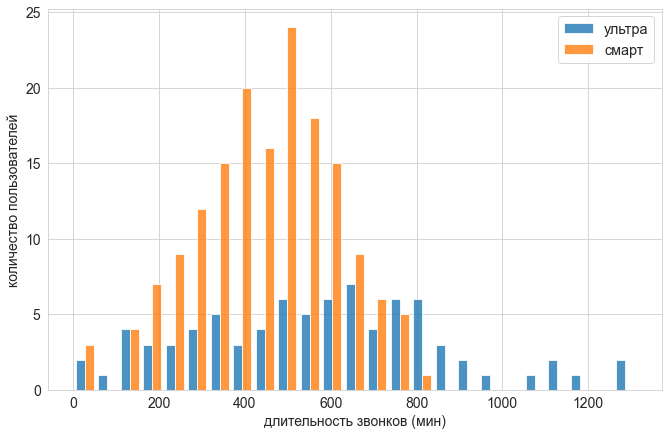

Месяц: 8
Ультра:
среднее -  581.207, дисперсия -  82327.957, стандартное отклонение -  286.928
Смарт:
среднее -  457.850, дисперсия -  28932.962, стандартное отклонение -  170.097


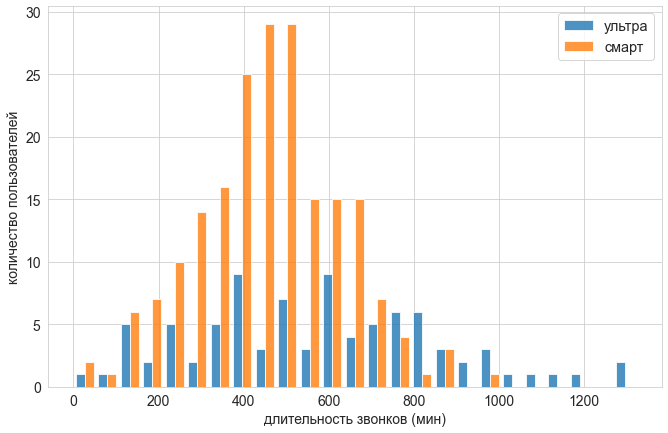

Месяц: 9
Ультра:
среднее -  589.500, дисперсия -  88609.828, стандартное отклонение -  297.674
Смарт:
среднее -  449.655, дисперсия -  29728.772, стандартное отклонение -  172.420


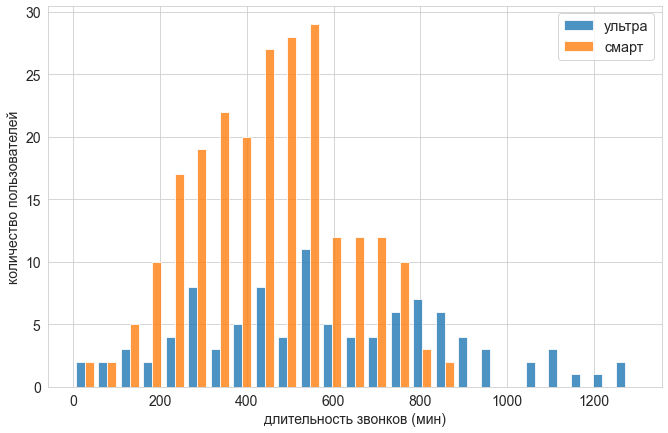

Месяц: 10
Ультра:
среднее -  613.810, дисперсия -  92519.810, стандартное отклонение -  304.171
Смарт:
среднее -  456.518, дисперсия -  30676.219, стандартное отклонение -  175.146


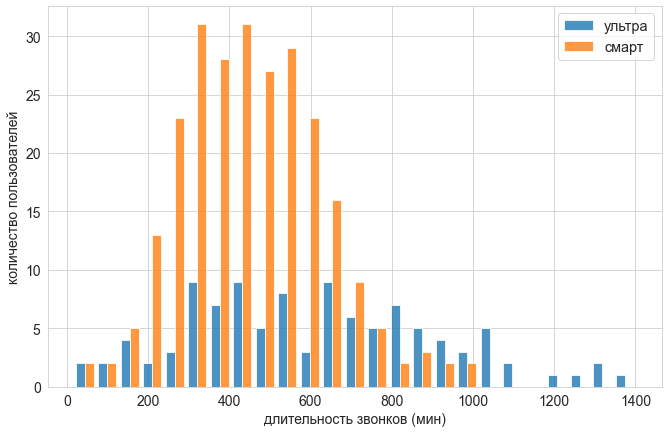

Месяц: 11
Ультра:
среднее -  595.491, дисперсия -  83806.721, стандартное отклонение -  289.494
Смарт:
среднее -  456.660, дисперсия -  27748.674, стандартное отклонение -  166.579


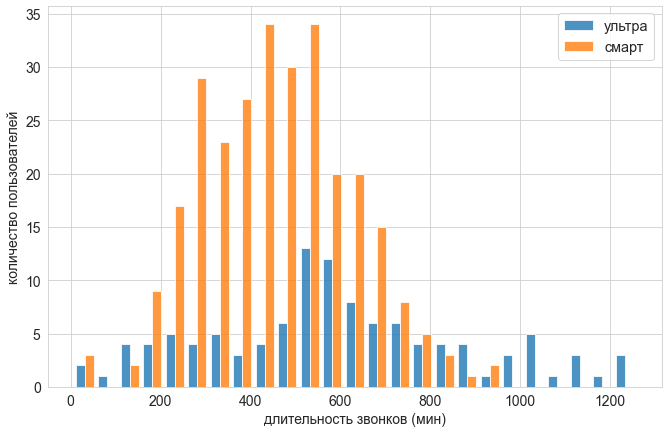

Месяц: 12
Ультра:
среднее -  627.254, дисперсия -  106605.315, стандартное отклонение -  326.505
Смарт:
среднее -  490.110, дисперсия -  39833.496, стандартное отклонение -  199.583


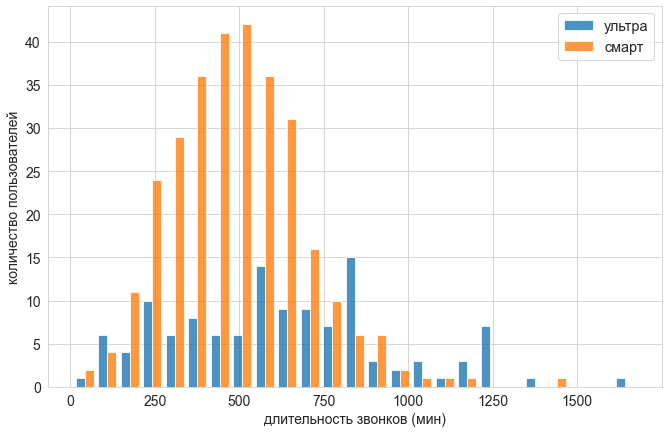

Среднее Ультры - 597.1958617328982, среднее Смарта - 459.47964988280023


In [27]:
mean_ultra = 0
mean_smart = 0
for i in range(7, 13):
    print(f'Месяц: {i}')
    ultra = month_calls.query('tariff == "ultra"')
    ultra = ultra.loc[ultra[i] >= 0, i]
    smart = month_calls.query('tariff == "smart"')
    smart = smart.loc[smart[i] >= 0, i]
    print('Ультра:')
    distr_description(ultra)
    print('Смарт:')
    distr_description(smart)
    
    mean_ultra += ultra.mean()
    mean_smart += smart.mean()
    
    plt.figure(figsize=(11,7))
    plt.hist([ultra, smart], bins = 25, label=['ультра', 'смарт'], alpha=0.8)
    plt.xticks(fontsize=14)
    plt.xlabel('длительность звонков (мин)', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('количество пользователей', fontsize=14)
    plt.legend(loc='upper right', fontsize="x-large")
    plt.show()
    
print(f'Среднее Ультры - {mean_ultra / 6}, среднее Смарта - {mean_smart / 6}')    

В целом мы везде наблюдаем одну и ту же картину: среднее Ультры больше, однако больше и дисперсия, то есть распределение Ультры более "размазанно-плавное", в то время как Смарт больше "скучен" - но среднее у него меньше. Форма - в целом нормальное распределение. Поведение пользователей от месяца к месяцу каких-то ярких заметных изменений не претерпевает. Можно сказать, что пользователям Смарта в среднем нужно 460 минут, а Ультры - 600.

Перейдём к **смскам**:

Месяц: 7
Ультра:
среднее -  63.806, дисперсия -  2313.462, стандартное отклонение -  48.098
Смарт:
среднее -  42.451, дисперсия -  743.942, стандартное отклонение -  27.275


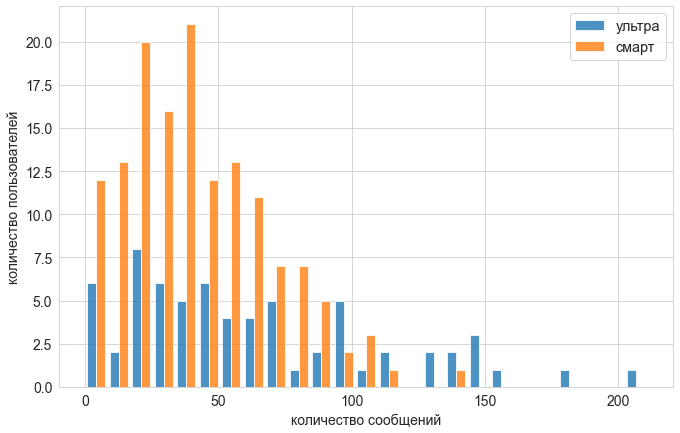

Месяц: 8
Ультра:
среднее -  63.014, дисперсия -  2128.708, стандартное отклонение -  46.138
Смарт:
среднее -  41.766, дисперсия -  756.284, стандартное отклонение -  27.501


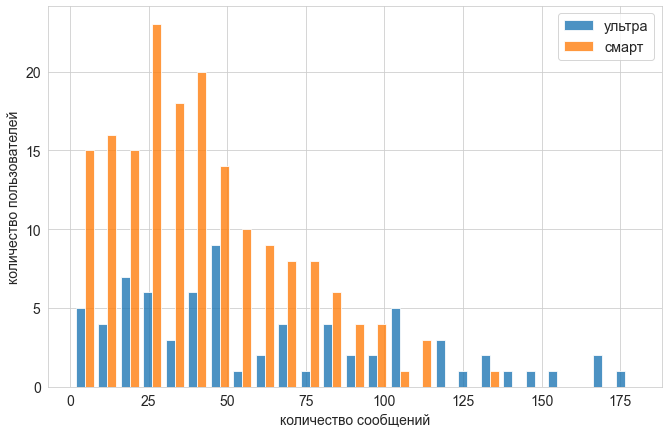

Месяц: 9
Ультра:
среднее -  65.943, дисперсия -  1949.799, стандартное отклонение -  44.157
Смарт:
среднее -  40.485, дисперсия -  713.694, стандартное отклонение -  26.715


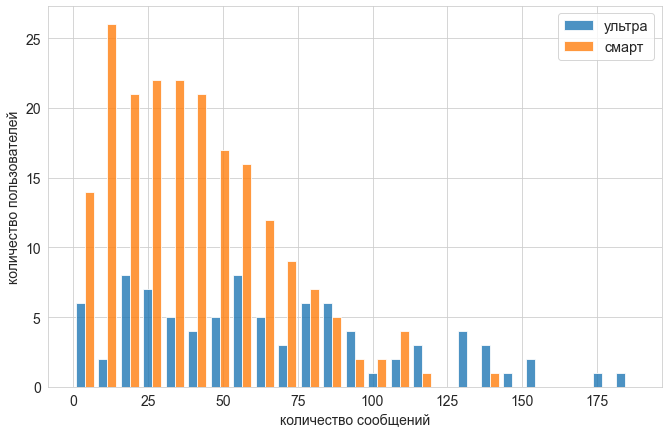

Месяц: 10
Ультра:
среднее -  72.678, дисперсия -  2200.446, стандартное отклонение -  46.909
Смарт:
среднее -  41.783, дисперсия -  732.889, стандартное отклонение -  27.072


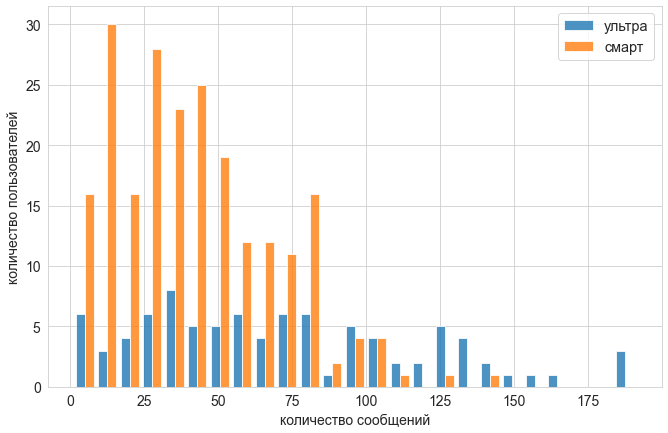

Месяц: 11
Ультра:
среднее -  68.408, дисперсия -  2238.285, стандартное отклонение -  47.311
Смарт:
среднее -  40.771, дисперсия -  704.423, стандартное отклонение -  26.541


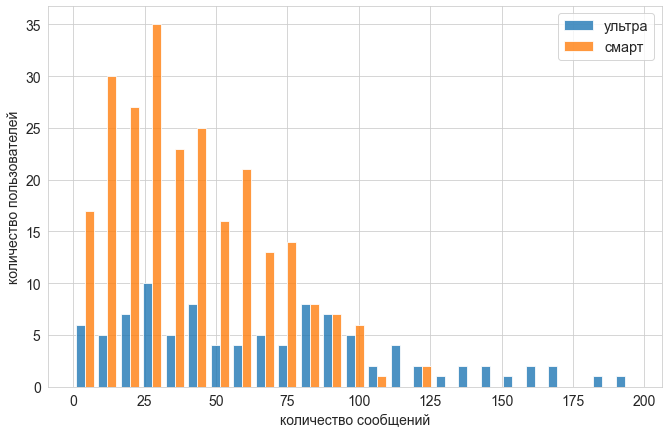

Месяц: 12
Ультра:
среднее -  72.009, дисперсия -  2417.639, стандартное отклонение -  49.169
Смарт:
среднее -  42.981, дисперсия -  864.414, стандартное отклонение -  29.401


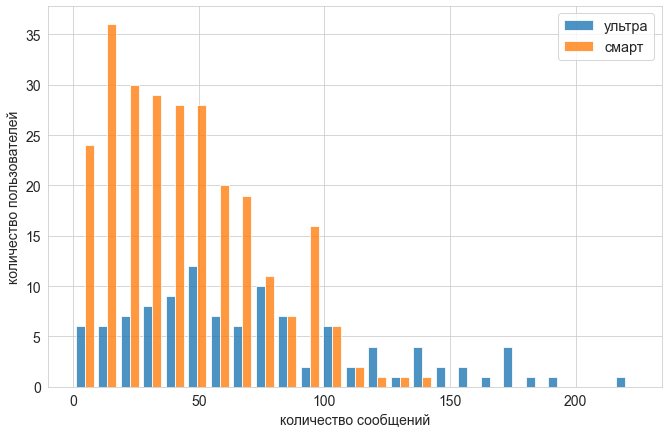

Среднее Ультры - 67.6428854783389, среднее Смарта - 41.70619677857375


In [28]:
mean_ultra = 0
mean_smart = 0

for i in range(7, 13):
    print(f'Месяц: {i}')
    ultra = month_messages.query('tariff == "ultra"')
    ultra = ultra.loc[ultra[i] >= 0, i]
    smart = month_messages.query('tariff == "smart"')
    smart = smart.loc[smart[i] >= 0, i]
    print('Ультра:')
    distr_description(ultra)
    print('Смарт:')
    distr_description(smart)
    
    mean_ultra += ultra.mean()
    mean_smart += smart.mean()
    
    plt.figure(figsize=(11,7))
    plt.hist([ultra, smart], bins = 25, label=['ультра', 'смарт'], alpha=0.8)
    plt.xticks(fontsize=14)
    plt.xlabel('количество сообщений', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('количество пользователей', fontsize=14)
    plt.legend(loc='upper right', fontsize="x-large")
    plt.show()
    
print(f'Среднее Ультры - {mean_ultra / 6}, среднее Смарта - {mean_smart / 6}')  

И здесь история та же: большее среднее у Ультры при большей размазанности - меньшее среднее у Смарта при большей скученности. Пользователям Смарта в среднем нужно 40 смс, а пользователям Ультры - 65-70. Посмотрим на **интернет**:

Месяц: 7
Ультра:
среднее -  21.602, дисперсия -  87.242, стандартное отклонение -  9.340
Смарт:
среднее -  17.378, дисперсия -  21.746, стандартное отклонение -  4.663


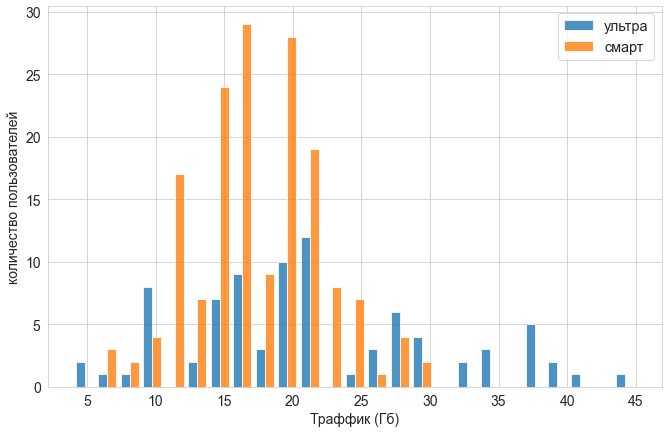

Месяц: 8
Ультра:
среднее -  22.056, дисперсия -  86.235, стандартное отклонение -  9.286
Смарт:
среднее -  17.900, дисперсия -  22.121, стандартное отклонение -  4.703


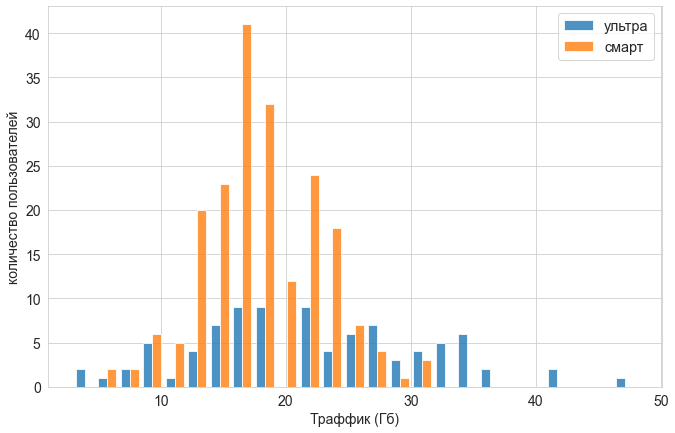

Месяц: 9
Ультра:
среднее -  20.534, дисперсия -  73.741, стандартное отклонение -  8.587
Смарт:
среднее -  17.172, дисперсия -  19.988, стандартное отклонение -  4.471


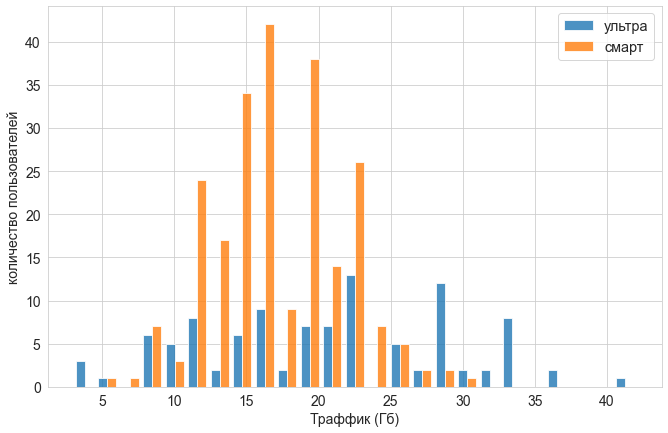

Месяц: 10
Ультра:
среднее -  20.917, дисперсия -  82.937, стандартное отклонение -  9.107
Смарт:
среднее -  18.110, дисперсия -  22.502, стандартное отклонение -  4.744


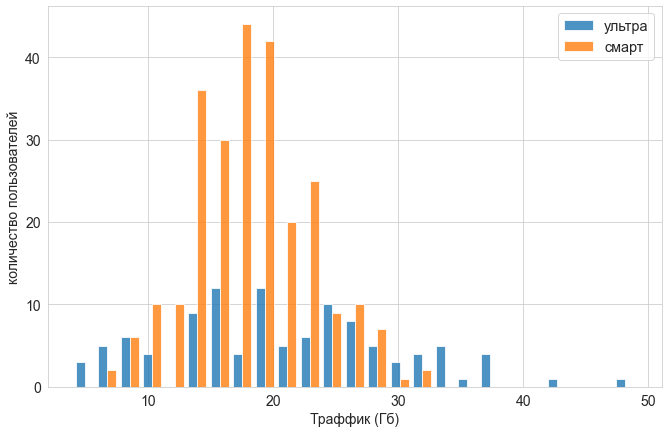

Месяц: 11
Ультра:
среднее -  21.069, дисперсия -  85.282, стандартное отклонение -  9.235
Смарт:
среднее -  17.770, дисперсия -  21.000, стандартное отклонение -  4.583


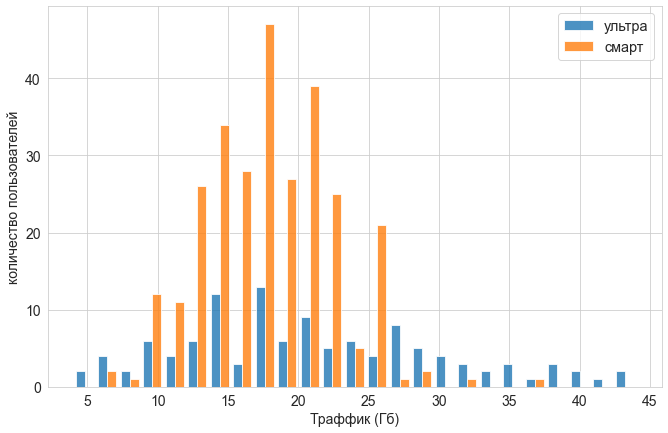

Месяц: 12
Ультра:
среднее -  22.508, дисперсия -  93.964, стандартное отклонение -  9.693
Смарт:
среднее -  18.542, дисперсия -  29.409, стандартное отклонение -  5.423


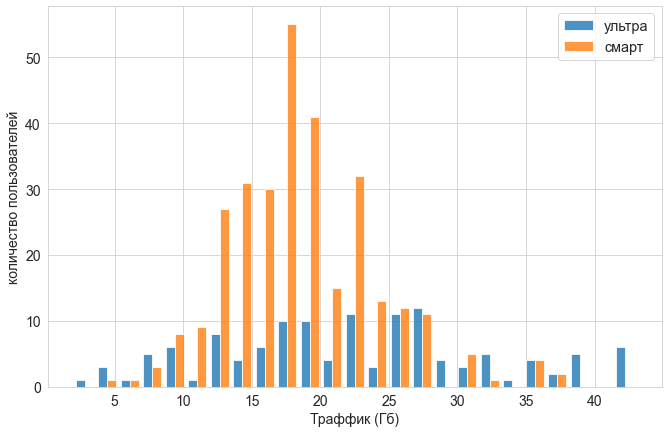

Среднее Ультры - 21.447689781367327, среднее Смарта - 17.811967513517803


In [29]:
mean_ultra = 0
mean_smart = 0

for i in range(7, 13):
    print(f'Месяц: {i}')
    ultra = month_internet.query('tariff == "ultra"')
    ultra = ultra.loc[ultra[i] >= 0, i]
    smart = month_internet.query('tariff == "smart"')
    smart = smart.loc[smart[i] >= 0, i]
    print('Ультра:')
    distr_description(ultra)
    print('Смарт:')
    distr_description(smart)
    
    mean_ultra += ultra.mean()
    mean_smart += smart.mean()
    
    plt.figure(figsize=(11,7))
    plt.hist([ultra, smart], bins = 25, label=['ультра', 'смарт'], alpha=0.8)
    plt.xticks(fontsize=14)
    plt.xlabel('Траффик (Гб)', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('количество пользователей', fontsize=14)
    plt.legend(loc='upper right', fontsize="x-large")
    plt.show()
    
print(f'Среднее Ультры - {mean_ultra / 6}, среднее Смарта - {mean_smart / 6}')  

И здесь всё то же самое. Пользователям Смарта в среднем нужно 18 Гб интернета, а Ультры - 21.

Итого: в среднем пользователи Ультры потребляют больше и минут звонков, и смс, и интернета, однако и разброс у них больший. 

Наконец посмотрим на **выручку**:

Месяц: 7
Ультра:
среднее -  2132.143, дисперсия -  213111.015, стандартное отклонение -  461.639
Смарт:
среднее -  1347.951, дисперсия -  534582.329, стандартное отклонение -  731.151


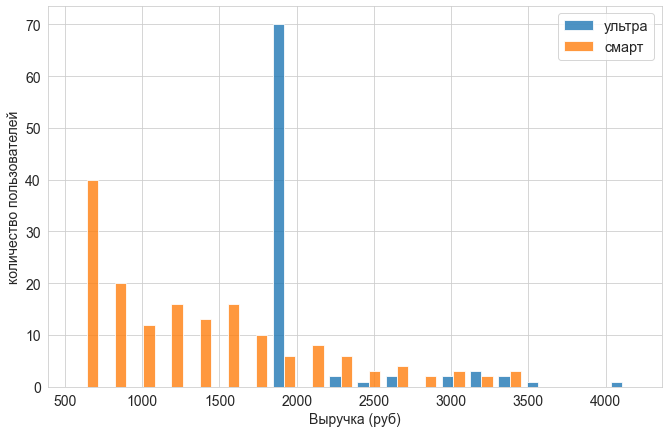

Месяц: 8
Ультра:
среднее -  2108.333, дисперсия -  186250.000, стандартное отклонение -  431.567
Смарт:
среднее -  1440.560, дисперсия -  633719.544, стандартное отклонение -  796.065


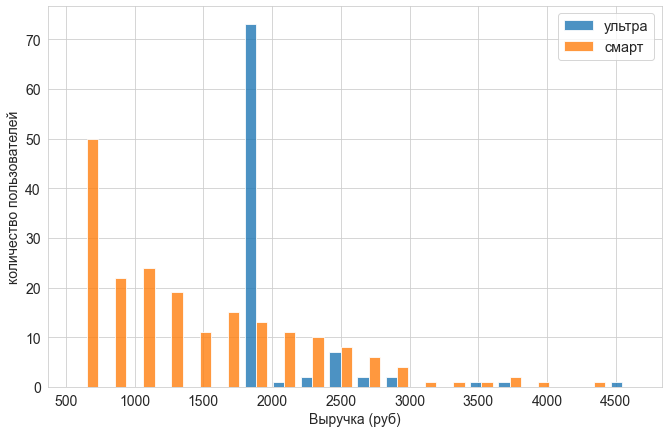

Месяц: 9
Ультра:
среднее -  2032.212, дисперсия -  66792.149, стандартное отклонение -  258.442
Смарт:
среднее -  1321.223, дисперсия -  541456.243, стандартное отклонение -  735.837


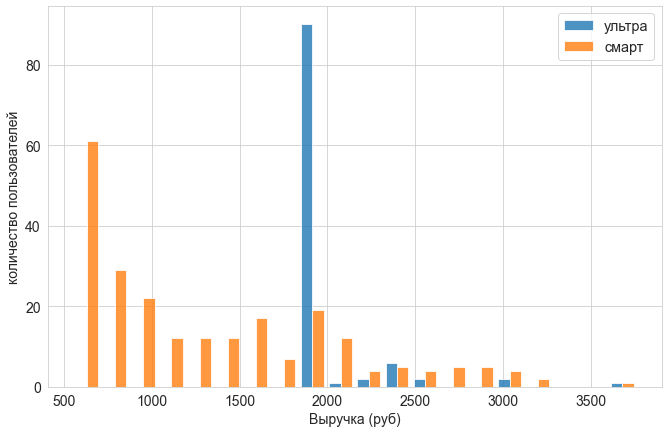

Месяц: 10
Ультра:
среднее -  2076.606, дисперсия -  166322.630, стандартное отклонение -  407.827
Смарт:
среднее -  1478.878, дисперсия -  717110.305, стандартное отклонение -  846.824


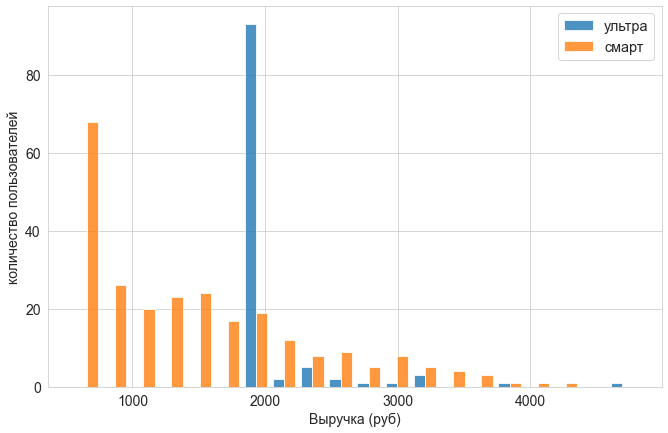

Месяц: 11
Ультра:
среднее -  2106.410, дисперсия -  185971.485, стандартное отклонение -  431.244
Смарт:
среднее -  1414.544, дисперсия -  639434.979, стандартное отклонение -  799.647


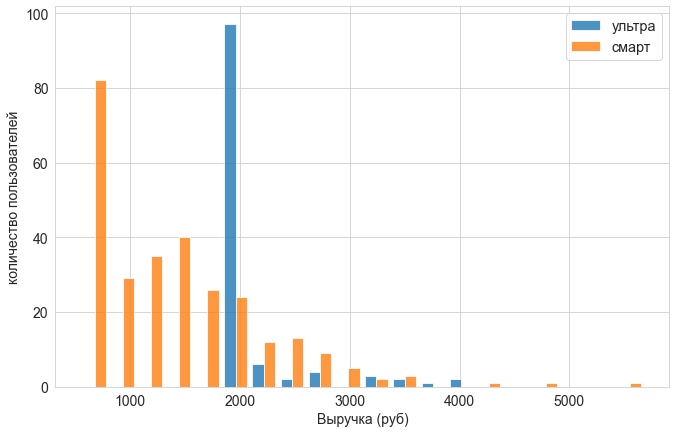

Месяц: 12
Ультра:
среднее -  2156.693, дисперсия -  251046.119, стандартное отклонение -  501.045
Смарт:
среднее -  1635.110, дисперсия -  1121852.505, стандартное отклонение -  1059.175


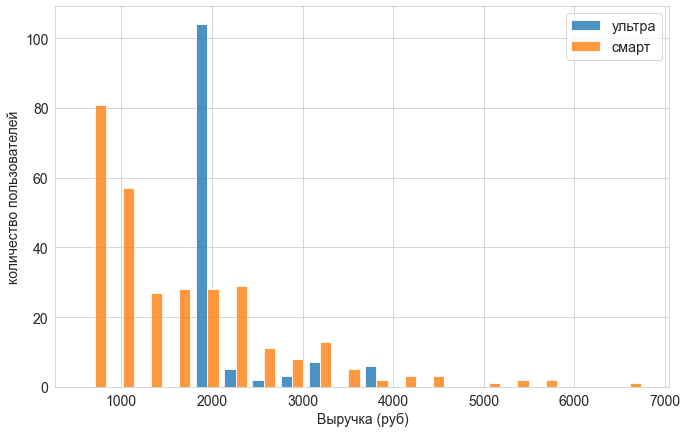

In [30]:
month_profit = pd.merge(data_profit, tariff_dict, on='user_id')

for i in range(7, 13):
    print(f'Месяц: {i}')
    ultra = month_profit.query('tariff == "ultra"')
    ultra = ultra.loc[ultra[i] >= 0, i]
    smart = month_profit.query('tariff == "smart"')
    smart = smart.loc[smart[i] >= 0, i]
    print('Ультра:')
    distr_description(ultra)
    print('Смарт:')
    distr_description(smart)
    
    plt.figure(figsize=(11,7))
    plt.hist([ultra, smart], bins = 20, label=['ультра', 'смарт'], alpha=0.8)
    plt.xticks(fontsize=14)
    plt.xlabel('Выручка (руб)', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('количество пользователей', fontsize=14)
    plt.legend(loc='upper right', fontsize="x-large")
    plt.show()

Распределение **выручки** нормальным не назовёшь - поведение выручки по месяцам так же достаточно однородно, то есть значительной разницы между месяцами нет. 

# <center>Общий вывод</center>

В среднем пользователи тарифа Ультра потребляют больше и звонков, и смсок, и интернета в месяц - однако и разброс среди них больше; распределения Ультры более плавные и протяжённые. По данным за второе полугодие 2018 года:
* минут пользователям тарифа Ультра в среднем требуется 600, а Смарта - 460
* смс пользователям тарифа Ультра в среднем требуется 65-70, а Смарта - 40
* гигабайт интернета пользователям тарифа Ультра в среднем требуется 21, а Смарта - 18

Средняя выручка пользователей тарифа Ультра так же больше при меньшем разбросе: пользователи Ультры редко выходят за лимиты своего тарифа, в то время как пользователи Смарта доплачивают заметно чаще. Общее поведение пользователей достаточно однородно, то есть не претерпевает заметных изменений от месяца к месяцу, и в длительности звонков, и в количестве отправляемых сообщений, и в интернет-траффике.